In [ ]:
import pandas as pd     # для чтения и записи табличных файлов
import numpy as np      # для математической обработки данных
import matplotlib.pyplot as plt # для построения графиков

In [ ]:
url = "https://drive.google.com/uc?export=download&id=1XFViS21mLmAnVUqzVsMYgxZUPw6sYn00"
input_df = pd.read_csv(url, sep = ',') 
input_df.head()

,Wind_power_MW,Solar_power_kW,Consumption_MW
0,65.655516,0.0000,34.70
1,69.111069,0.0000,32.79
2,72.134678,178.6368,33.09
3,75.590232,721.5360,33.63
4,68.247181,3752.5248,34.51


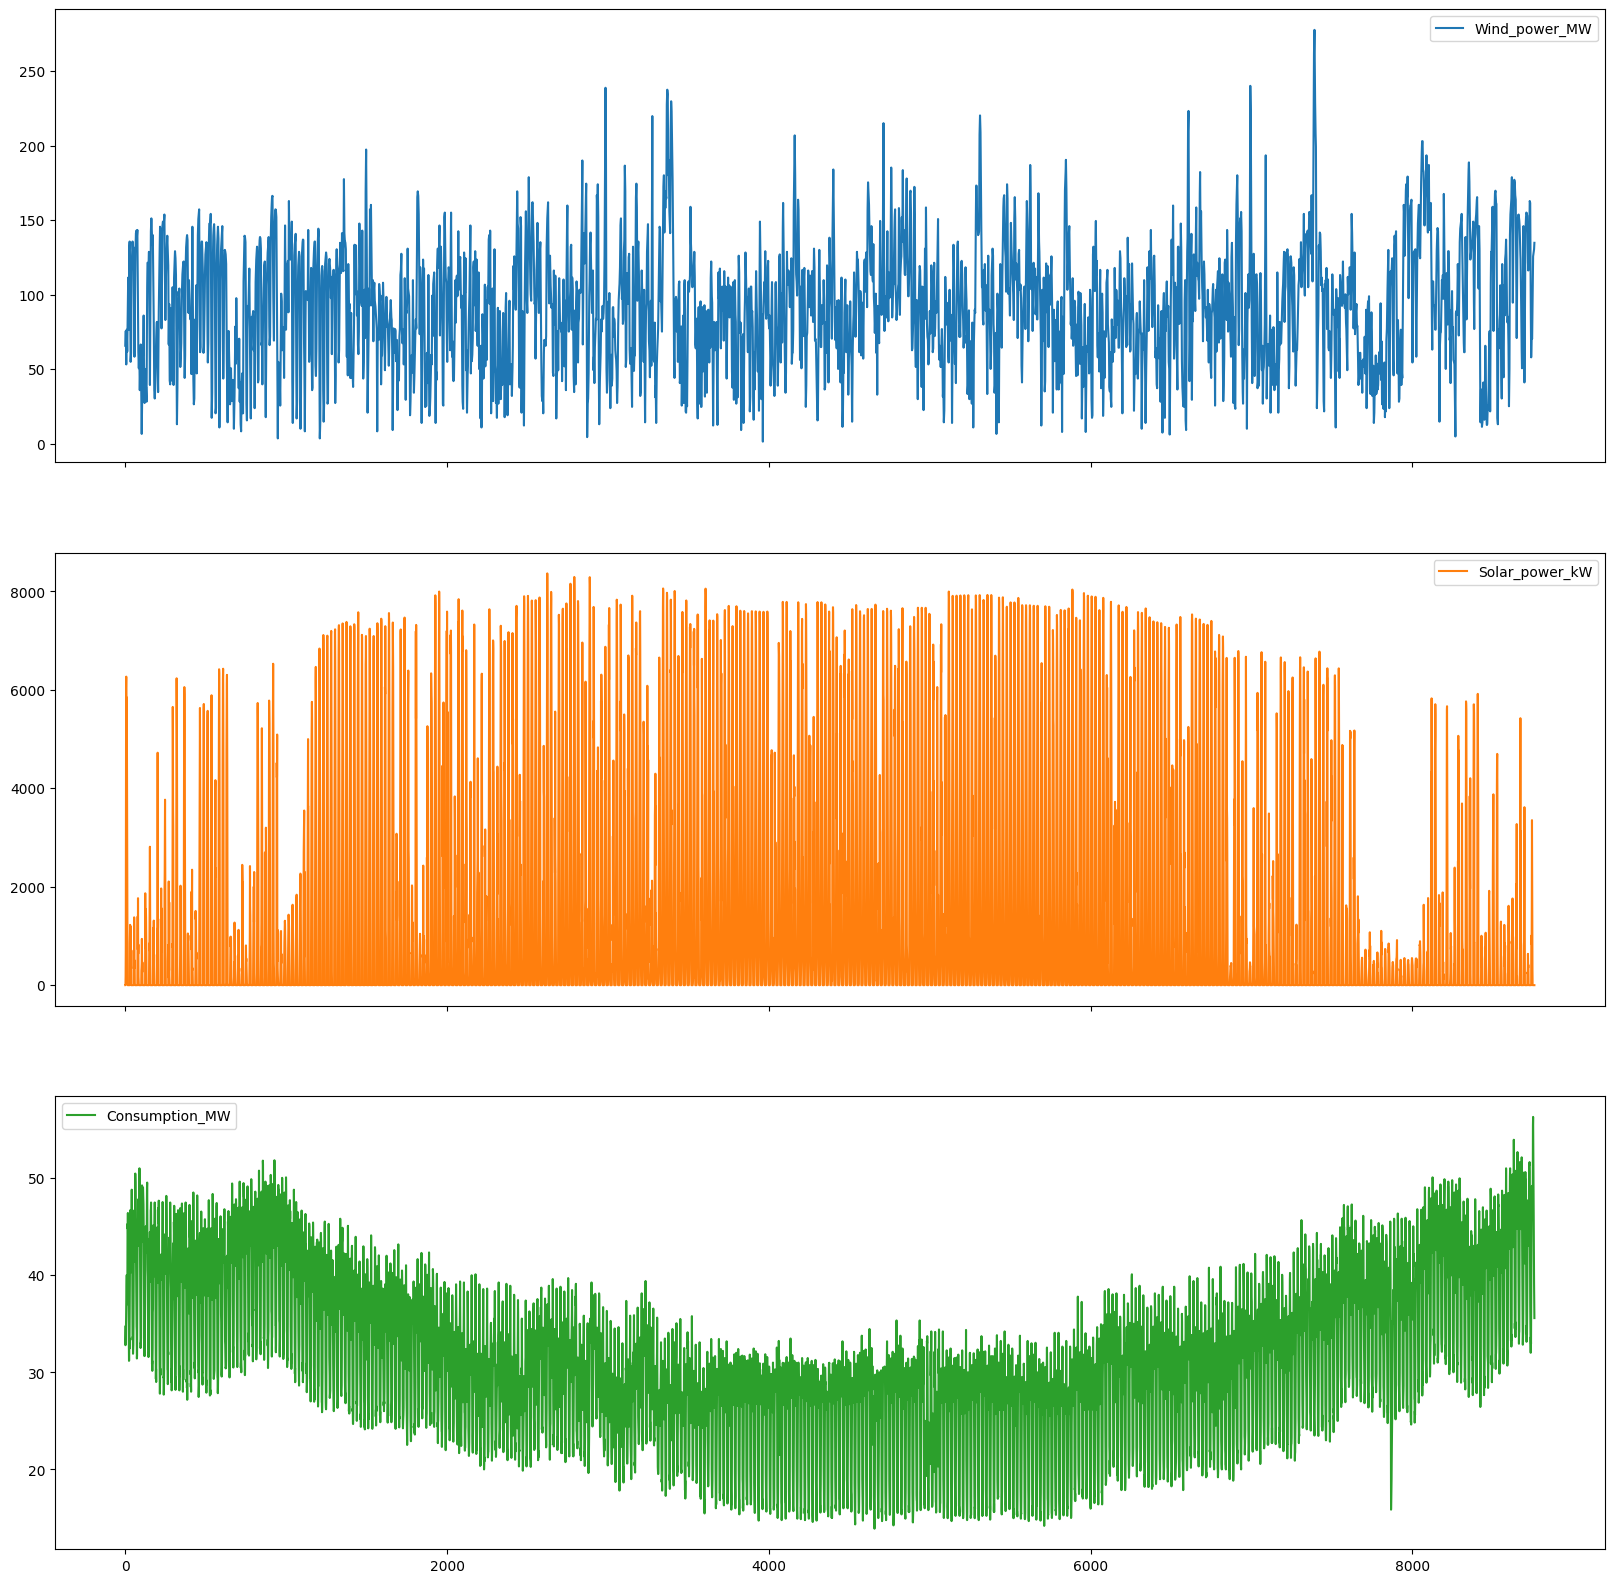

In [ ]:
axes = input_df.plot(marker=None, figsize=(20, 20), subplots = True)

In [ ]:
input_matrix = input_df.values # перевод таблицы в матрицу

print('размерность матрицы', input_matrix.shape)
print()

# можно посчитать среднее, минимальное, максимальное и прочие показатели

# цикл от 1 до числа столбцов
for i in range(0, len(input_df.columns)):
  # функция print выводит строку на экран
  # функция формат применяется к шаблону строки для подстановки в него нужных данных в нужном формате
  # запись input_matrix[: , i] означает что нужно взять все строки и i-й столбец из матрицы
  print("{: <12} mean = {:.2f}".format(input_df.columns[i], input_matrix[ :  , i].mean()))

размерность матрицы (8760, 3)

Wind_power_MW mean = 91.84
Solar_power_kW mean = 1557.83
Consumption_MW mean = 31.15


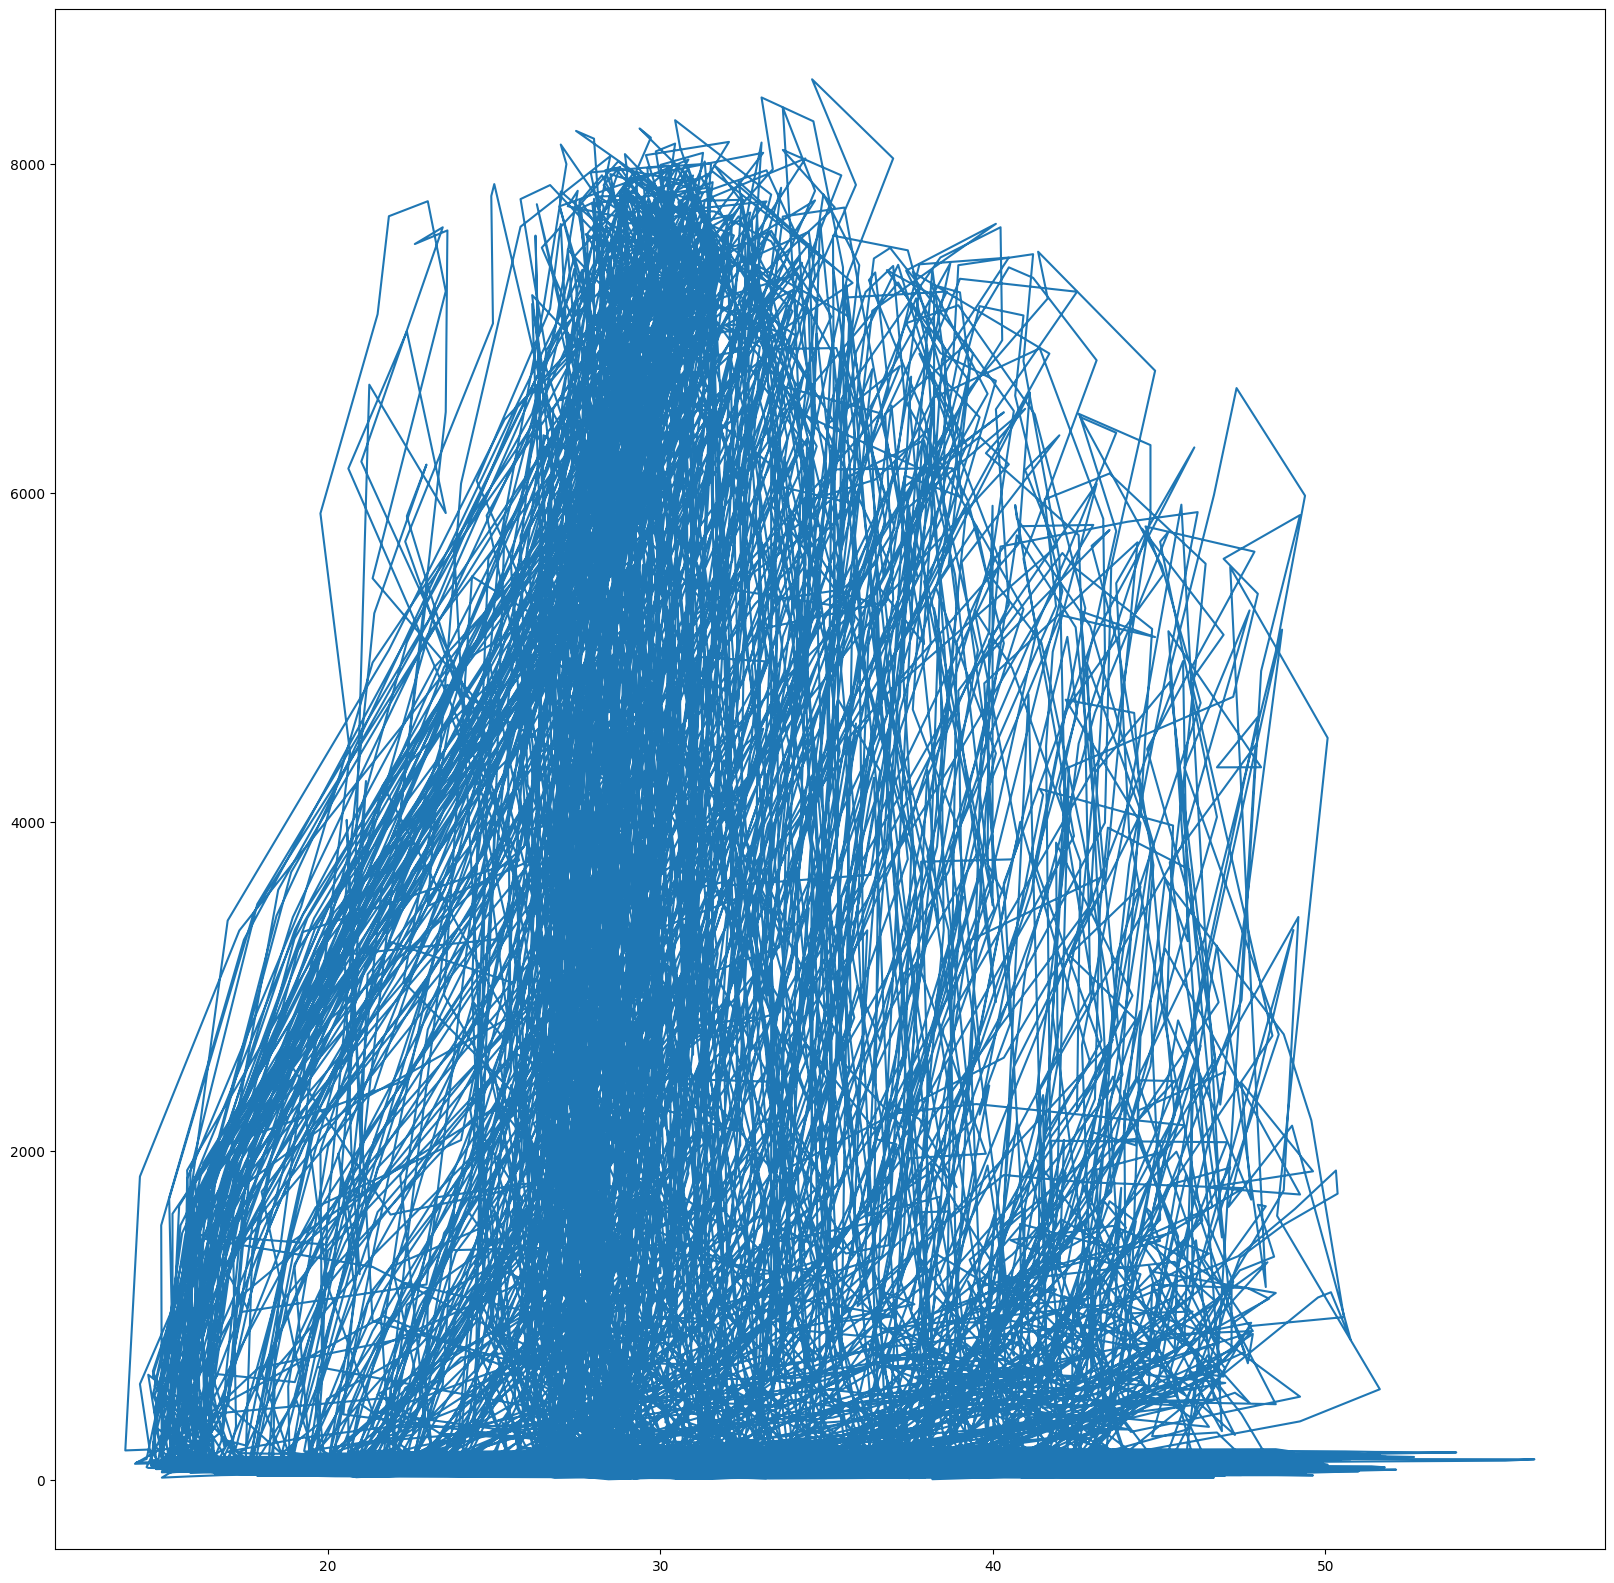

Кол-во энергии для продажи 14180418.875263462, кол-во энергии для докупки: 2235.564491199999


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
url =  "https://drive.google.com/uc?export=download&id=1XFViS21mLmAnVUqzVsMYgxZUPw6sYn00"
csv= pd.read_csv(url, sep = ',')
summa = [csv['Wind_power_MW'][i]+csv['Solar_power_kW'][i] for i in range(len(csv))]#сумаа первых двух столбцов
rez = csv['Consumption_MW']#третий столбец
fig, ax = plt.subplots(1, 1, figsize = (20,20))#создание осей
plt.plot(rez,summa)#отмечаем точки
plt.show()#выводим график
men = [abs(summa[i]-rez[i]) for i in range(len(summa)) if (summa[i]-rez[i])<0]#считаем количество докупаемой энергии
bol = [summa[i]-rez[i] for i in range(len(summa)) if (summa[i]-rez[i])>0]#считаем количество продоваемой(оставшейся) энергии
sum_men = 0
sum_bol = 0
for i in range(len(men)):
    sum_men+=men[i]
for i in range(len(bol)):
    sum_bol += bol[i]


print(f"Кол-во энергии для продажи {sum_bol}, кол-во энергии для докупки: {sum_men}")

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from bokeh.plotting import figure, output_file, show
from bokeh.io import output_notebook

url =  "https://drive.google.com/uc?export=download&id=1XFViS21mLmAnVUqzVsMYgxZUPw6sYn00"
csv= pd.read_csv(url, sep = ',')
print(csv.head())
print(csv.tail())

summa = [csv['Wind_power_MW'][i]+csv['Solar_power_kW'][i] for i in range(len(csv))]#сумаа первых двух столбцов
rez = csv['Consumption_MW']#третий столбец
fig, ax = plt.subplots(1, 1, figsize = (20,20))#создание осей
plt.plot(rez,summa)#отмечаем точки
plt.savefig('saved_figure.png', transparent=True)
men = [abs(summa[i]-rez[i]) for i in range(len(summa)) if (summa[i]-rez[i])<0]#считаем количество докупаемой энергии
bol = [summa[i]-rez[i] for i in range(len(summa)) if (summa[i]-rez[i])>0]#считаем количество продоваемой(оставшейся) энергии
sum_men = 0
sum_bol = 0
for i in range(len(men)):
    sum_men+=men[i]
for i in range(len(bol)):
    sum_bol += bol[i]
print(f"Кол-во энергии для продажи {sum_bol}, кол-во энергии для докупки: {sum_men}")
output_notebook()
p = figure(title="Simple line example", x_axis_label='x', y_axis_label='y')
p.line(rez, summa, legend_label="Temp.",line_width = 2)
show(p)
matrix = [summa,rez]
data_frame = pd.DataFrame(matrix)
data_frame.to_excel('forecast.xlsx', index = False)#сохранение в xlsx
#Есть вопрос по графику,мы решили сделать его целым ,и он имеет такой вид, думаем ,что он так не должен выглядеть и нужно просто взять какой-то диапозон значени.
#Также получилось не совсем по методичке ,т.к там похожего примера нету
#Также у нас нету временных рядов